In [1]:
''' 

Assignment #2

Paul Adunola & Gabriel Matsumoto

'''

import pandas as pd

auto_mpg = pd.read_csv('../data/auto_mpg.csv')

#Drop name columns

auto_mpg = auto_mpg.drop(['name'], axis=1)
auto_mpg.head()

,mpg,cyl,disp,hp,weight,accel,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [2]:
#Describe data

auto_mpg.describe()


,mpg,cyl,disp,hp,weight,accel,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


'''
 We decided to use 'accel' as response variable. In this case we have a regression problem.
'''

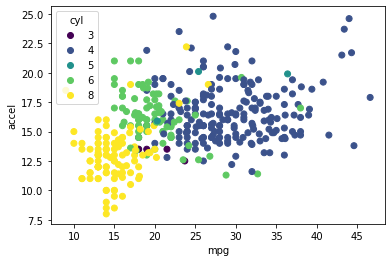

In [3]:
import matplotlib.pyplot as plt

# Make a plot using 'mpg' and 'accel' as x and y, respectively. 'cyl' is used as color
am_names = [3, 4, 5, 6, 8] # label for legend
x = auto_mpg.mpg # define x
y = auto_mpg.accel # define y
c = auto_mpg.cyl # define color categories
scatter = plt.scatter(x,y,c=c.astype('category').cat.codes)
plt.xlabel("mpg")
plt.ylabel("accel")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=am_names,title="cyl")
plt.show()

In [4]:
#importing matplotlib library with an alias as well as the seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid', color_codes = True)   

# hack to make seaborn plots bigger on jupyter notebooks
def setPlt():
    f, ax = plt.subplots(figsize = (10,8))
    sns.despine(f, left = True, bottom = True)

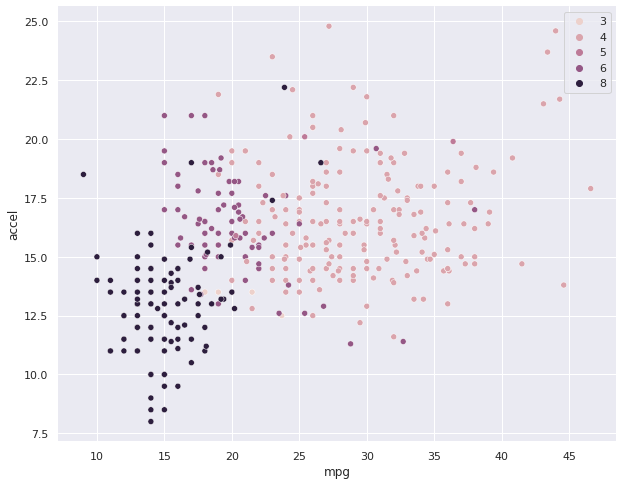

In [5]:
#Similar scatterplot but with the figure in larger scale
setPlt()
sns.scatterplot(x = 'mpg', y = 'accel', hue = 'cyl', data = auto_mpg)
plt.xlabel("mpg")
plt.ylabel("accel")
plt.legend(loc='upper right')

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cyl', ylabel='mpg'>,
        <AxesSubplot:xlabel='disp', ylabel='mpg'>,
        <AxesSubplot:xlabel='hp', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='accel', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cyl'>,
        <AxesSubplot:xlabel='cyl', ylabel='cyl'>,
        <AxesSubplot:xlabel='disp', ylabel='cyl'>,
        <AxesSubplot:xlabel='hp', ylabel='cyl'>,
        <AxesSubplot:xlabel='weight', ylabel='cyl'>,
        <AxesSubplot:xlabel='accel', ylabel='cyl'>,
        <AxesSubplot:xlabel='year', ylabel='cyl'>,
        <AxesSubplot:xlabel='origin', ylabel='cyl'>],
       [<AxesSubplot:xlabel='mpg', ylabel='disp'>,
        <AxesSubplot:xlabel='cyl', ylabel='disp'>,
        <AxesSubplot:xlabel='disp', ylabel='disp'>,
        <AxesSubplot:xlabe

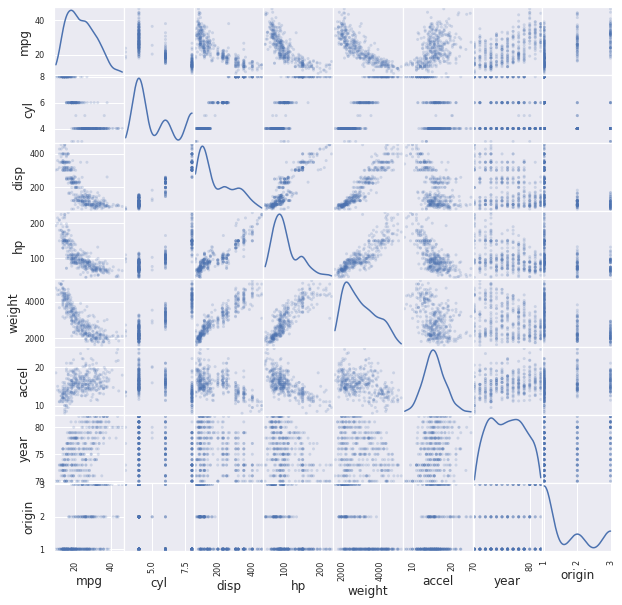

In [6]:
# Visualize ranges, correlations, density plots of values with scatter_matrix

from pandas.plotting import scatter_matrix

# Make a scatter matrix of fans, width, thick, leaf.length, and curve
scatter_matrix(auto_mpg,alpha=0.2, figsize=(10, 10), diagonal='kde')

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import plotnine as pn

In [8]:
# Setup data for modeling
X = auto_mpg.drop(columns = ['accel'])
y = auto_mpg.accel


In [9]:
# 10-fold Cross-validation scheme
kf = KFold(n_splits=10,  shuffle=True, random_state=123) # seed 123 for reproducible results

# Mean square error function
def mse(model, X, y):
    y_hat = model.predict(X)
    err = np.mean((y - y_hat)**2)
    return err

In [10]:
#Linear Regression model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
model.fit(X,y)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
lm_cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
lm_cv_r2 = res.mean()

print('c-v R^2:', lm_cv_r2, 'c-v MSE:', lm_cv_mse)

c-v R^2: 0.5769086689701177 c-v MSE: 3.081337953718765


In [11]:
#Ridge Regression model
lambdas = np.geomspace(0.001, 10, 100) 

model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=lambdas))
])
model.fit(X,y)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
rr_cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
rr_cv_r2 = res.mean()
print('c-v R^2:', rr_cv_r2, 'c-v MSE:', rr_cv_mse)

c-v R^2: 0.5753223013324946 c-v MSE: 3.1061007395872364


In [36]:
#Lasso Regression model
lambdas = np.geomspace(0.001, 10, 100) 

model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=lambdas))
])
model.fit(X,y)

res = cross_val_score(model, X, y, cv=kf, scoring=mse)
ls_cv_mse = res.mean()
res = cross_val_score(model, X, y, cv=kf)
ls_cv_r2 = res.mean()
print('c-v R^2:', ls_cv_r2, 'c-v MSE:', ls_cv_mse)


c-v R^2: 0.5756283260668659 c-v MSE: 3.206334196214926


In [41]:
pred = [['Linear Regression',lm_cv_r2,lm_cv_mse,],
        ['Ridge Regression',rr_cv_r2,rr_cv_mse,],
        ['Lasso Regression',ls_cv_r2,ls_cv_mse,]]
df = pd.DataFrame(pred, columns=['Model','r2','mse'])
df

# r^2 is still very low

,Model,r2,mse
0,Linear Regression,0.587734,3.039208
1,Ridge Regression,0.578160,3.099264
2,Lasso Regression,0.575628,3.206334


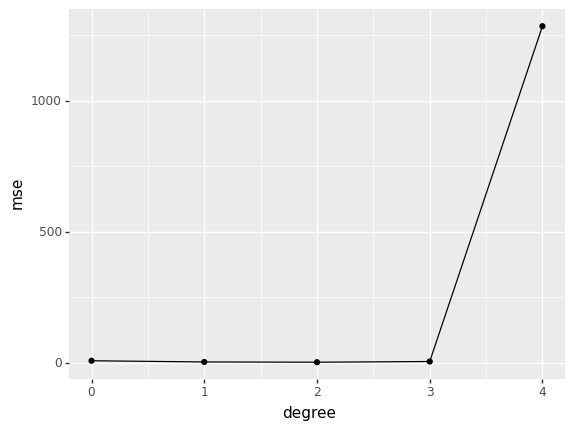

<ggplot: (2949541144045)>

In [156]:
#Checking for other polynomials to try to fit the data better
err = []
degrees = range(5)

for degree in degrees:
    # Make our model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression(fit_intercept=False))
    ])

    # Fit the model
    res = cross_val_score(model, X, y, cv=kf, scoring=mse)
    err.append(res.mean()) # Get MSE for model and append to list

err_df = pd.DataFrame({'degree':degrees, 'mse':err})
pn.ggplot(err_df, pn.aes(x='degree', y='mse')) + pn.geom_line() + pn.geom_point()

In [14]:
#grid to find the best polynomial to fit our data
from sklearn.model_selection import GridSearchCV
def PolynomialRegression(degree=2, **kwargs):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linreg', LinearRegression(fit_intercept=False))
    ])
param_grid = {'poly__degree': np.arange(10),
              'poly__interaction_only': [True, False],
              'poly__include_bias': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10)
# Once we call the .fit method all the models will be fit
grid.fit(X,y)

/apps/python/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/apps/python/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/apps/python/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/apps/python/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/apps

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linreg',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'poly__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'poly__include_bias': [True, False],
                         'poly__interaction_only': [True, False]})

In [15]:
# The best parameters are stored in grid.best_params_
grid.best_params_

{'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False}

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# We can then use the model using grid.best_estimator_
model = grid.best_estimator_

model.fit(X,y)

# print estimated values after 10-fold validation
kf = KFold(n_splits = 10, shuffle=True, random_state=123) #10-fold cross validation
res = cross_val_score(model, X, y, cv = kf, scoring=mse)
cv_mse = res.mean()
res = cross_val_score(model, X, y, cv = kf)
cv_r2 = res.mean()

print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse) #R^2 is now ~0.71. It improved but it is still a bit low

c-v R^2: 0.7183010861606441 c-v MSE: 2.0623130528168536


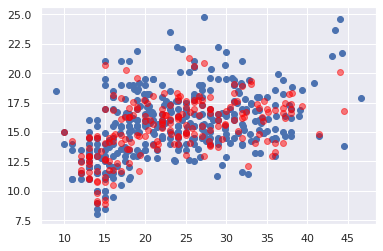

In [24]:
#Split our data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123) #50% of the data used for testing
# Predict our y's using the model
y_test = model.predict(X_test)
X_test_mpg = X_test.mpg
# Plot the data in blue and the predicted data in red.
plt.scatter(x,y) # Scatter plot of our training data
plt.scatter(X_test_mpg,y_test, color='red',alpha=0.5) # Our model

'''
 To analyze this dataset, we used 'accel' (acceleration information) as our response variable and the other variables were used to train the models. As part of the data cleaning, we dropped the 'name' column and proceeded with the analysis. First, we tried to fit the data using linear, lasso and ridge regression. Our results show that the three models tested were very similar, but the prediction accuracies were low (approximately 0.57). Therefore, we tried to increase the prediction accuracy by exploring polynomials that may fit the data better. Our results shows that the second-degree polynomial was the best choice. By fitting this new model, we were able to improve the prediction accuracy to 0.71 and decrease the mean square error. However, it is important to mention that even this model is still not optimal. When we plotted predicted values from our model versus the true observed values, it was noticeable that the predictions were not always correct with some values falling far from the true observations  
'''
